### Visualize `.pkl` and `.npz`

In [23]:
import config,csv,os,pickle,random,utils
import numpy as np
import matplotlib.pyplot as plt

print ("Done.")

Done.


### Parse `./video_path.csv`

In [24]:
csv_path = './video_path.csv'
name_and_time = dict()
with open(csv_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    cnt = 0
    for row in csv_reader:
        if cnt > 0: # skip the first line (header)
            name_and_time[row[0]] = (float(row[1]), float(row[2]))
        cnt += 1
# Get video IDs
video_ids = []
for vid_name,(s_t,e_t) in name_and_time.items():
    print ("Name:[%s] [%.2f]s~[%.2f]s"%(vid_name,s_t,e_t))
    video_ids.append(vid_name)
n_vid = len(video_ids)
print ("video_ids:%s"%(video_ids))

Name:[MVI_0005] [0.00]s~[0.00]s
Name:[1X5A1788] [0.00]s~[0.00]s
Name:[1X5A1789] [0.00]s~[0.00]s
Name:[1X5A1790] [0.00]s~[0.00]s
Name:[MVI_0003] [0.00]s~[0.00]s
Name:[MVI_0004] [0.00]s~[0.00]s
video_ids:['MVI_0005', '1X5A1788', '1X5A1789', '1X5A1790', 'MVI_0003', 'MVI_0004']


### Loop to plot results in
- `./skeletons_pkl/NAME/scene_XXXXXX.pkl`
- `./skeletons_pkl/NAME/scene_XXXXXX.npz`

[0/6] [MVI_0005]


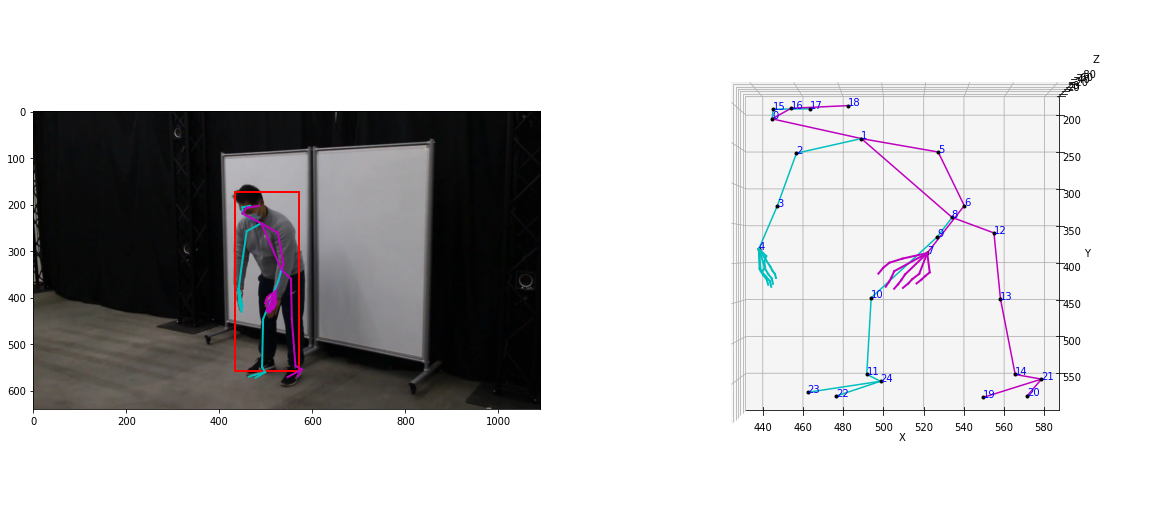

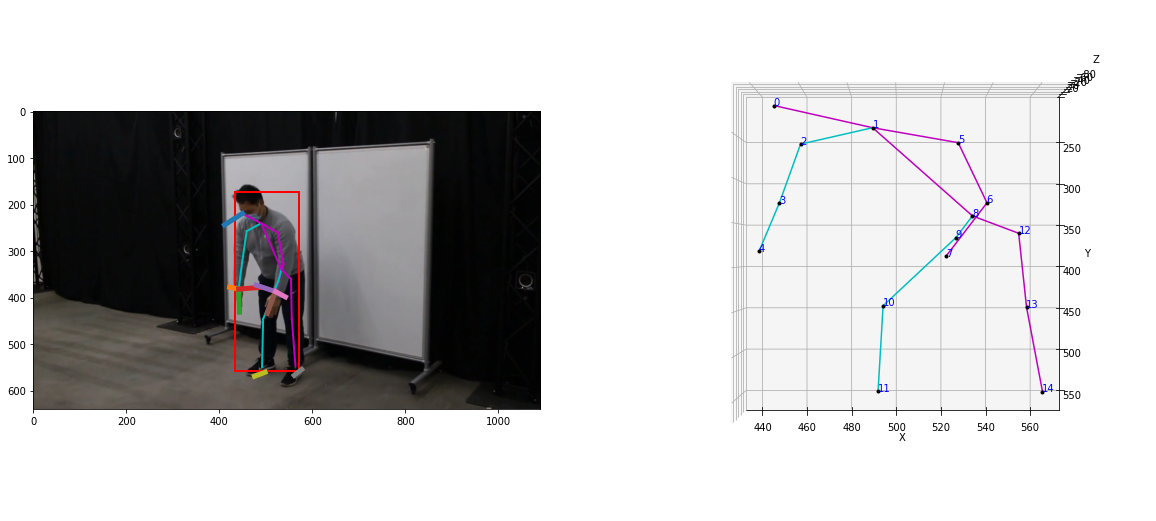

[1/6] [1X5A1788]


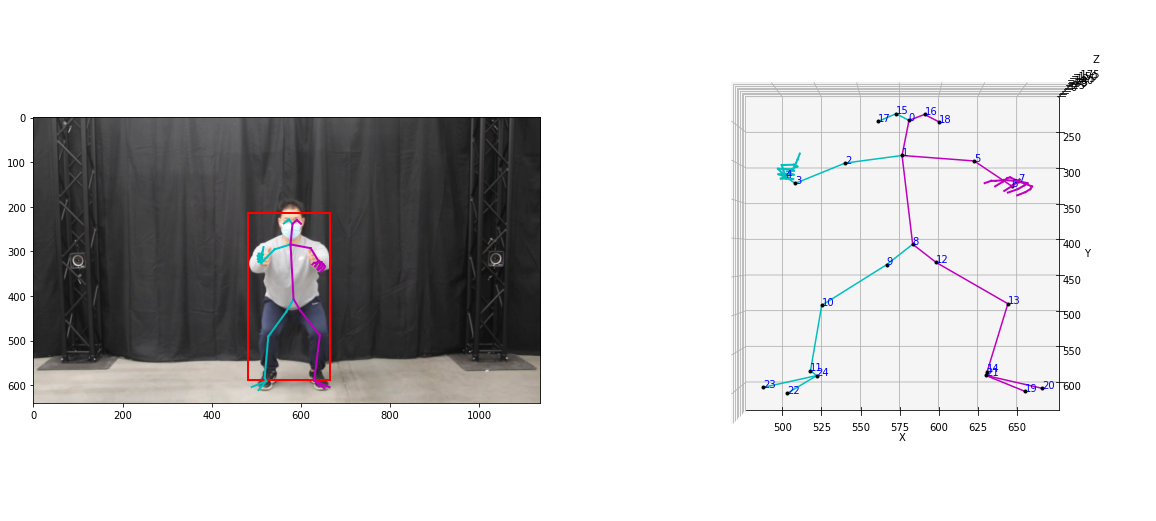

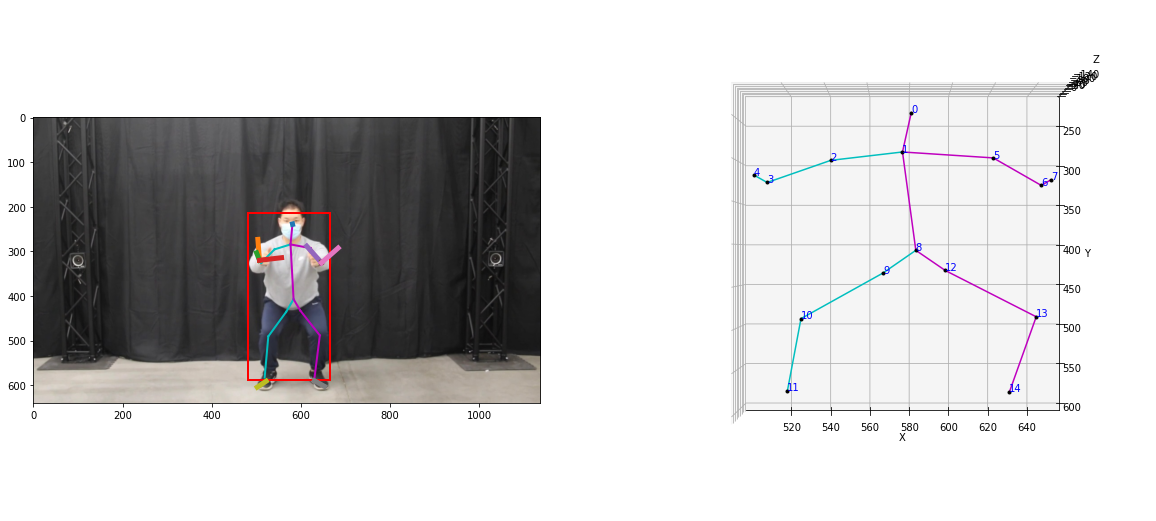

[2/6] [1X5A1789]


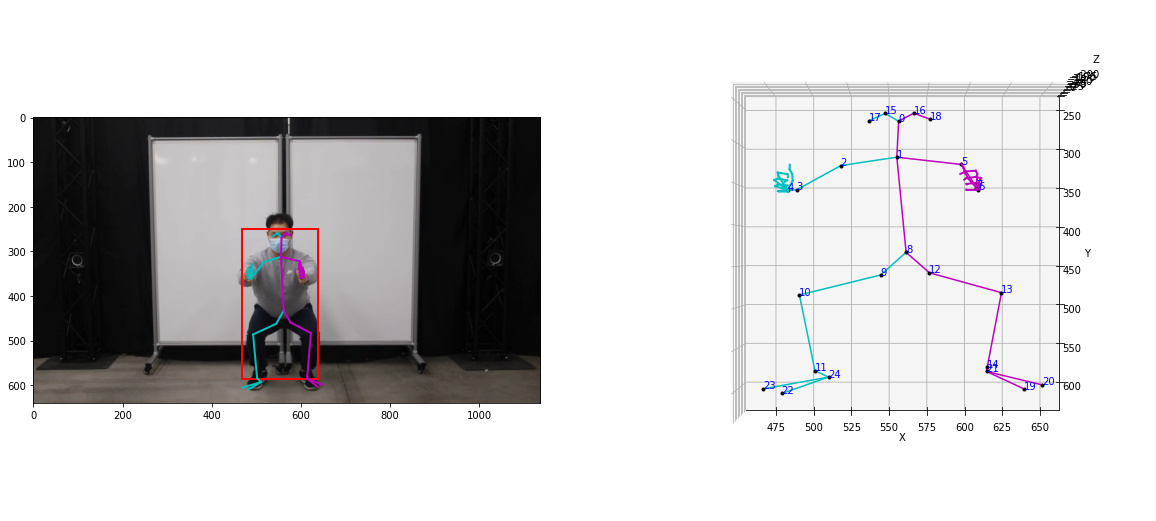

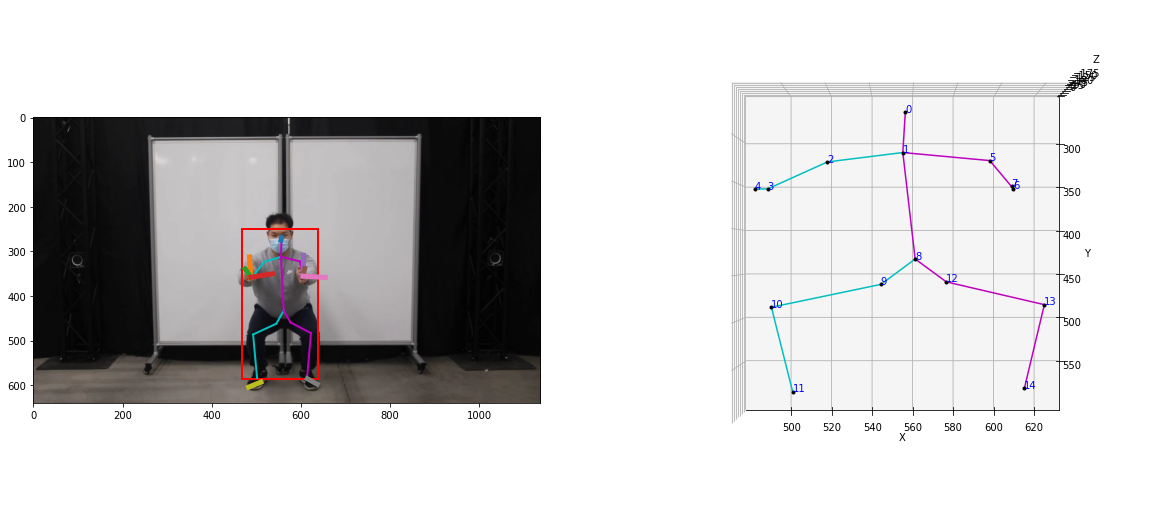

[3/6] [1X5A1790]


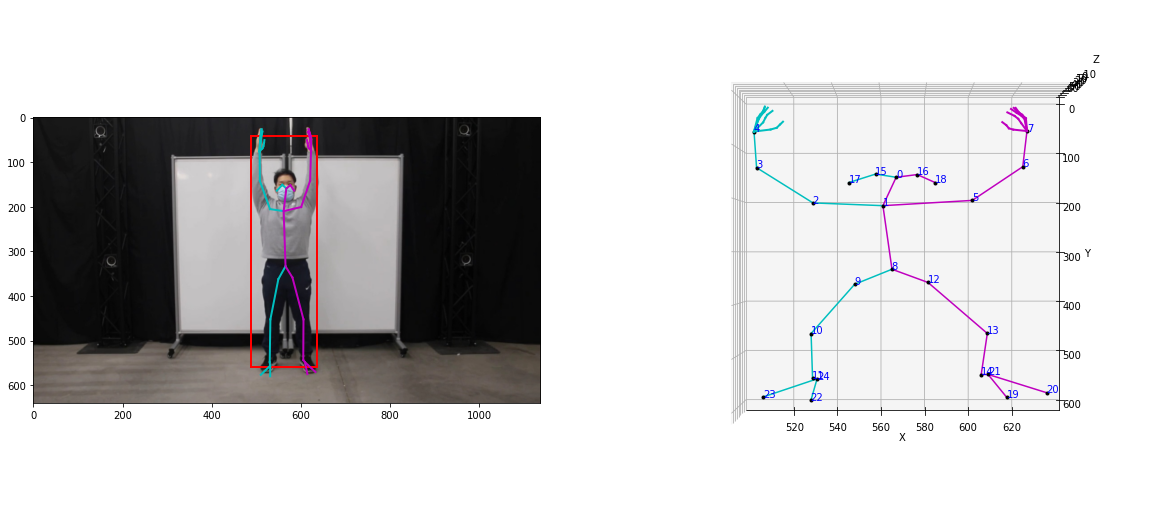

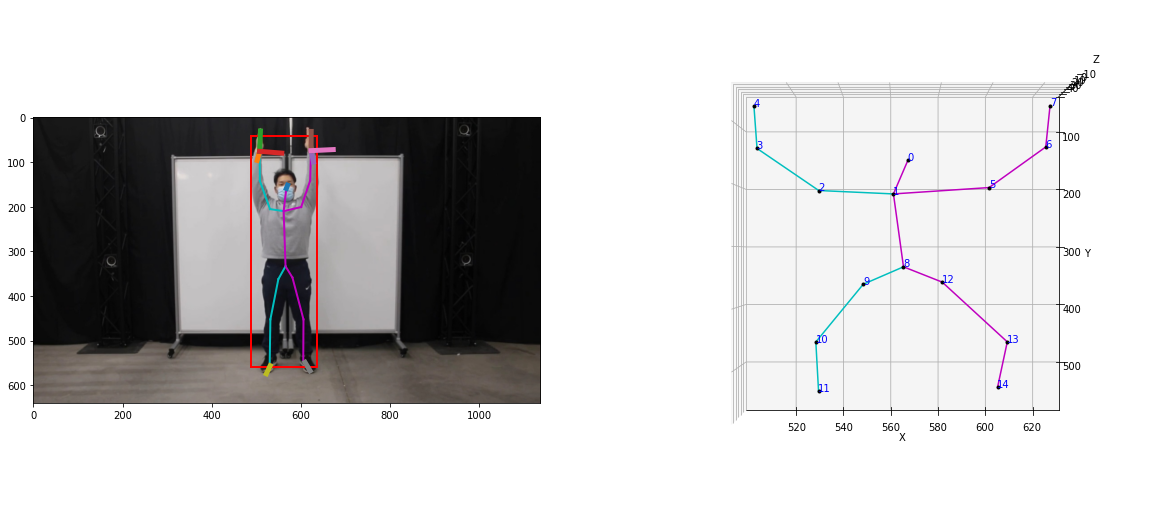

[4/6] [MVI_0003]


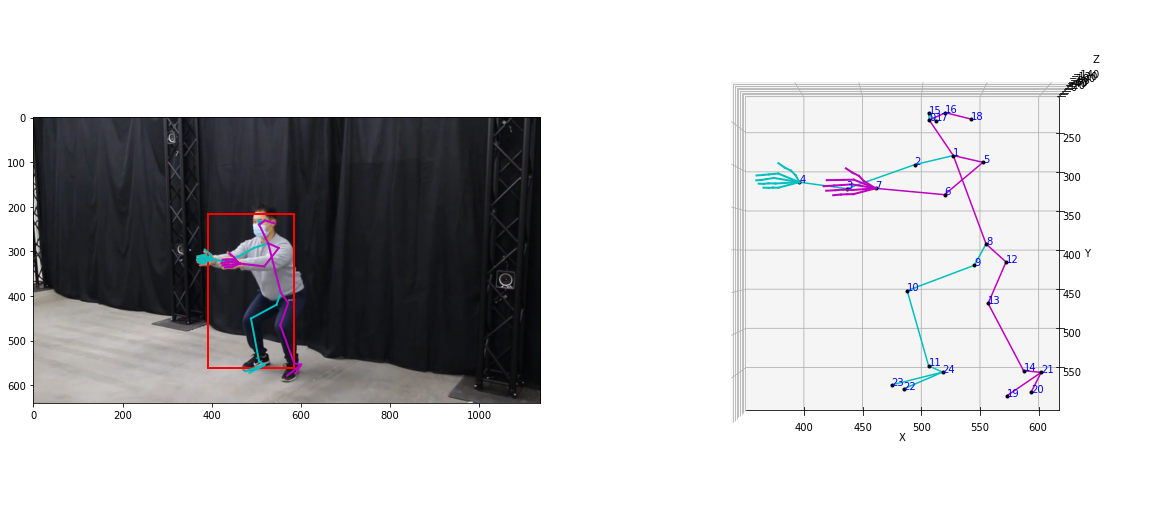

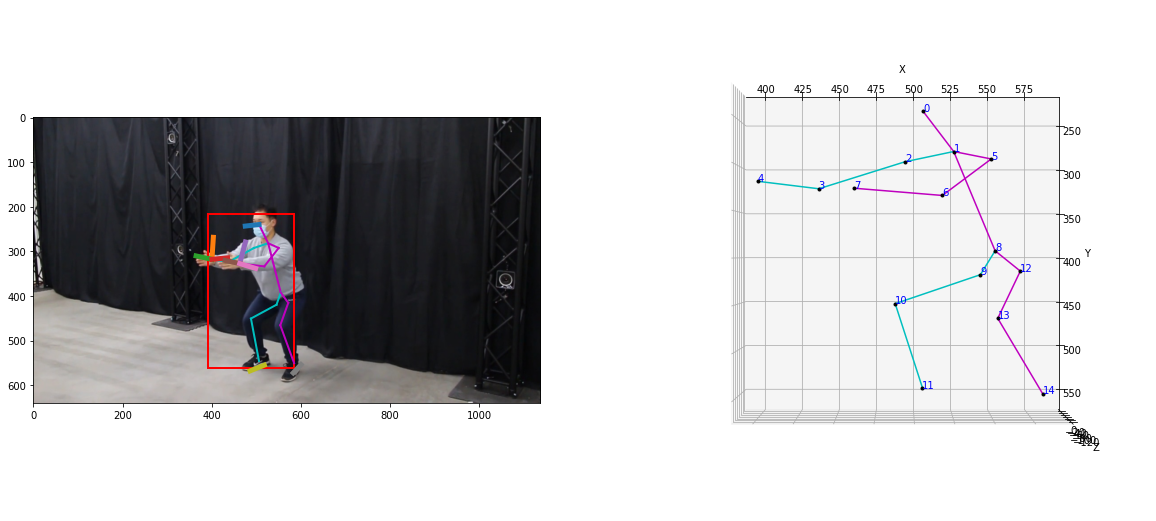

[5/6] [MVI_0004]


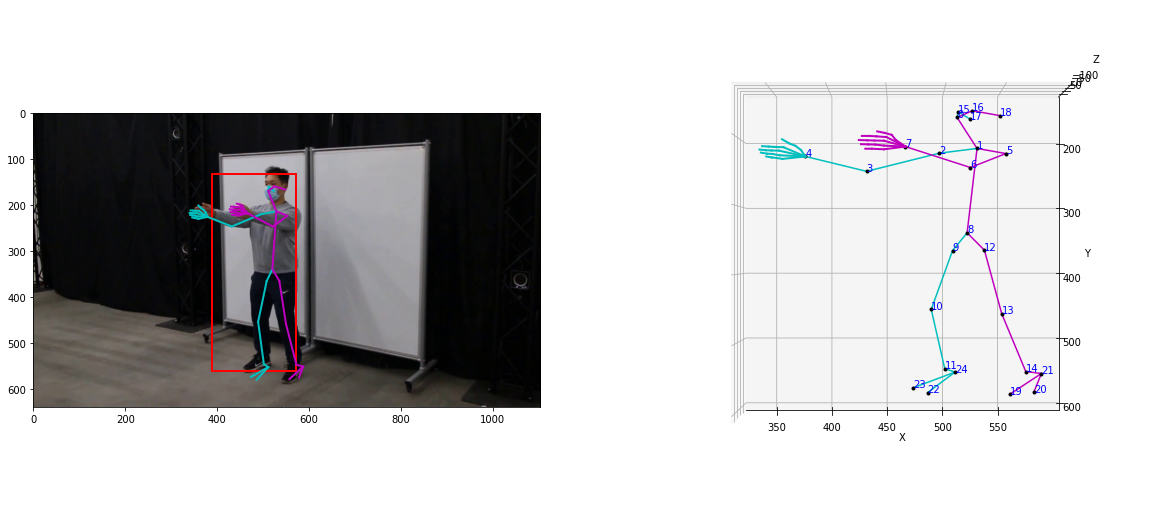

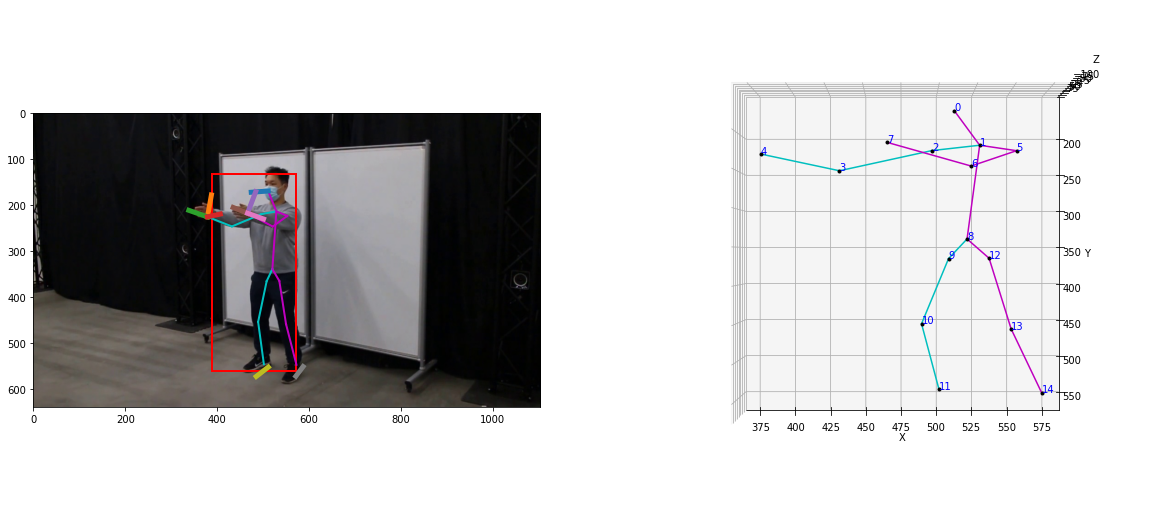

Done.


In [28]:
for v_idx,video_id in enumerate(video_ids):
    print ("[%d/%d] [%s]"%(v_idx,len(video_ids),video_id))
    pkl_dir = os.path.join(config.skeleton_pkl_dir, video_id)
    npz_dir = os.path.join(config.skeleton_npz_dir, video_id)
    pkl_list = os.listdir(pkl_dir)
    npz_list = os.listdir(npz_dir)
    
    # sample one example
    random_fp = random.choice(pkl_list)
    img_fp = os.path.join(config.image_dir, video_id, random_fp[:-4]+'.jpg')
    img = plt.imread(img_fp)
    curr_pkl = pickle.load(open(os.path.join(pkl_dir, random_fp), 'rb'))
    curr_npz = np.load(os.path.join(npz_dir, random_fp.replace('pkl', 'npz')))
    
    ### [PKL] Plot 2D result
    fig = plt.figure(figsize=(20, 10))
    ax_1 = fig.add_subplot(121)
    ax_1.imshow(img)
    utils.plot_2D(curr_pkl['open_pose'], config.open_pose_dict, 
                  curr_pkl['left_hand'], curr_pkl['right_hand'], config.hand_dict,
                  curr_pkl['body_bbox'], ax_1)
    ### [PKL] Plot 3D result
    ax_2 = fig.add_subplot(122, projection='3d')
    utils.plot_3D(curr_pkl['open_pose'], curr_pkl['left_hand'], curr_pkl['right_hand'],
                  config.open_pose_dict, config.hand_dict, ax_2)
    ### [NPZ] Plot 2D result
    # NPZ files contain just simplified version of extracted skeletons.    
    # 0  ~ 45 : pose that was 15 by 3
    # 45 ~ 51 : head pos(3), vec(3)
    # 51 ~ 63 : left hand thumb vector(3), index vector(3), palm vector(3), wrist pos(3)
    # 63 ~ 75 : right hand thumb vector(3), index vector(3), palm vector(3), wrist pos(3)
    # 75 ~ 87 : left heel pos (3), left foot vec (3), right heel pos (3), right foot vec (3)
    pose_array = curr_npz['arr_0']
    body_pose = pose_array[:45]
    head_info = {'pos': pose_array[45:48], 'vec': pose_array[48:51]}
    
    left_hand_info = {'thumb': pose_array[51:54], 'index': pose_array[54:57], 'palm': pose_array[57:60], 
                      'pos': pose_array[60:63]}
    right_hand_info = {'thumb': pose_array[63:66], 'index': pose_array[66:69], 'palm': pose_array[69:72], 
                       'pos': pose_array[72:75]}

    left_heel_info = {'pos': pose_array[75:78], 'vec': pose_array[78:81]}
    right_heel_info = {'pos': pose_array[81:84], 'vec': pose_array[84:87]}
    
    ### [NPZ] Plot 2D result
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(121)
    ax.imshow(img)
    utils.plot_2D(pose_array[:45], config.simple_pose_dict, 
                  list(), list(), None,
                  pose_array[87:91], ax, draw_hand=False)

    utils.plot_head_info(head_info, ax)
    utils.plot_hand_info(right_hand_info, ax)
    utils.plot_hand_info(left_hand_info, ax)
    utils.plot_heel_info(left_heel_info, right_heel_info, ax)
    ### [NPZ] Plot 3D result
    ax = fig.add_subplot(122, projection='3d')
    utils.plot_3D(body_pose, [], [],
                  config.simple_pose_dict, {}, ax, draw_hand=False)
    plt.show()
print ("Done.")